In [2]:
import matplotlib.pyplot as plt
import numpy as np
from bank import Bank
from players import (
    RollThresholdPlayer, HumanPlayer, ProbabilisticPlayer, 
    GreedyPlayer, SesquaGreedyPlayer, AntiGreedyPlayer, 
    ThersholdPlayer, GreedyPlayerK, TrollPlayer
)

In [3]:

# Define your players here
players = [
    GreedyPlayer(),
    RollThresholdPlayer(threshold=7),
    ThersholdPlayer(threshold=100),
]

# Simulation parameters
rounds = 10
num_simulations = 10000

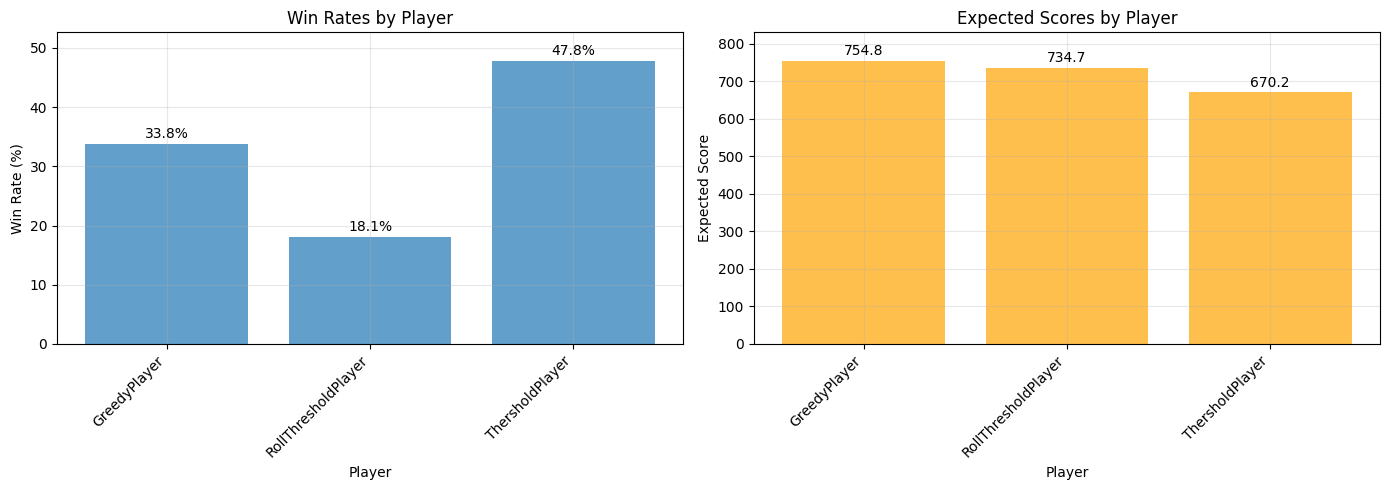

In [4]:

# Calculate expected scores and win rates
expected_scores, win_percentages, tie_percentages = Bank.get_all(
    players, rounds=rounds, num_simulations=num_simulations
)

# Get player names for labels
player_names = [player.__class__.__name__ for player in players]

# Create 1x2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Win Rates
bars1 = ax1.bar(range(len(players)), win_percentages * 100, alpha=0.7)
ax1.set_xlabel('Player')
ax1.set_ylabel('Win Rate (%)')
ax1.set_title('Win Rates by Player')
ax1.set_xticks(range(len(players)))
ax1.set_xticklabels(player_names, rotation=45, ha='right')
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, max(win_percentages) * 100 * 1.1])

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars1, win_percentages * 100)):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{val:.1f}%', ha='center', va='bottom')

# Plot 2: Expected Scores
bars2 = ax2.bar(range(len(players)), expected_scores, alpha=0.7, color='orange')
ax2.set_xlabel('Player')
ax2.set_ylabel('Expected Score')
ax2.set_title('Expected Scores by Player')
ax2.set_xticks(range(len(players)))
ax2.set_xticklabels(player_names, rotation=45, ha='right')
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, max(expected_scores) * 1.1])

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars2, expected_scores)):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(expected_scores) * 0.01,
             f'{val:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()